In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from get_data import *

# SciKit Learn Modules
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Load Standardized Industrials Data

In [2]:
industrials_df_col_names = [
	't_ev',
	't_rev',
	'ebitda',
	'ebitda_margin',
	't_ev/t_rev',
	't_ev/ebitda',
	'est_ann_rev_gr_minus_1yr_minus_capiq',
	'est_ann_ebitda_gr_minus_1yr_minus_capiq',
	't_rev_1yr_growth',
	'ebitda_1yr_growth',
	't_rev_3_yr_cagr',
	'ebitda_3yr_cagr',
	't_rev_5yr_cagr',
	'ebitda_5yr_cagr',
	'return_on_assets',
	'return_on_equity',
	'capex_as_percent_rev',
	'ebitda/interest_exp',
	't_debt/cap_percent',
	't_debt/equity_percent'
	]

# Load Raw Data
raw_data_arrays         = get_raw_data()
raw_industrials_array   = np.split(raw_data_arrays[2], [1], axis=1)
raw_industrials_array_x = raw_industrials_array[1]
raw_industrials_array_y = raw_industrials_array[0]
raw_industrials_df      = pd.DataFrame( raw_data_arrays[2], columns=industrials_df_col_names )

# Load Standardized Data
std_data_arrays         = get_standardized_data()
std_industrials_array   = np.split(std_data_arrays[2], [1], axis=1)
std_industrials_array_x = std_industrials_array[1]
std_industrials_array_y = std_industrials_array[0]
std_industrials_df      = pd.DataFrame( std_data_arrays[2], columns=industrials_df_col_names )

# Plot Correlation Matrix

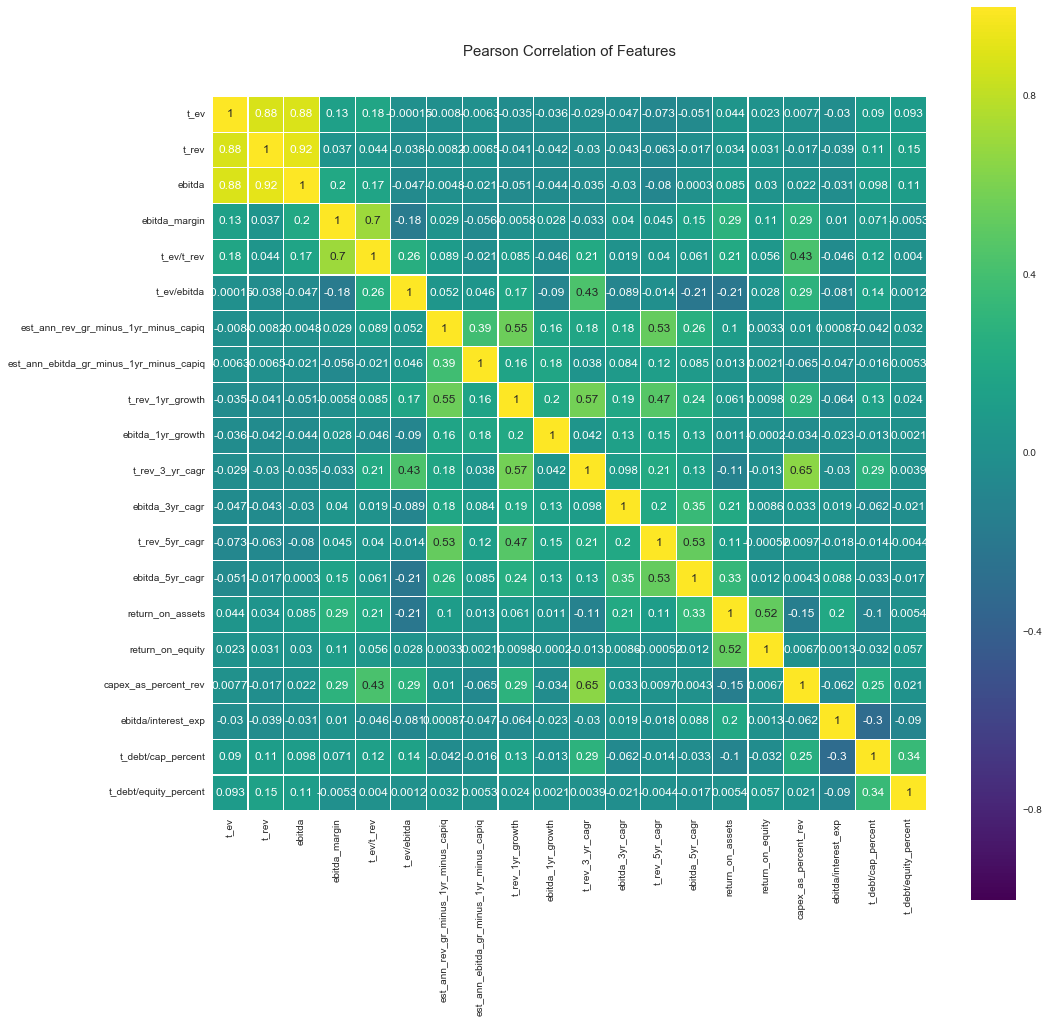

In [3]:
# Plot Feature Correlation Matrix
colormap = plt.cm.viridis
plt.figure( figsize=(16,16) )
plt.title( 'Pearson Correlation of Features', y=1.05, size=15 )
sns.heatmap( std_industrials_df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True )

In [3]:
feature_units = [
	'Million US Dollars ($)',
	'Million US Dollars ($)',
	'Million US Dollars ($)',
	'Percentage (%)',
	'Ratio',
	'Ratio',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Percentage (%)',
	'Ratio',
	'Ratio',
	'Ratio'
	]

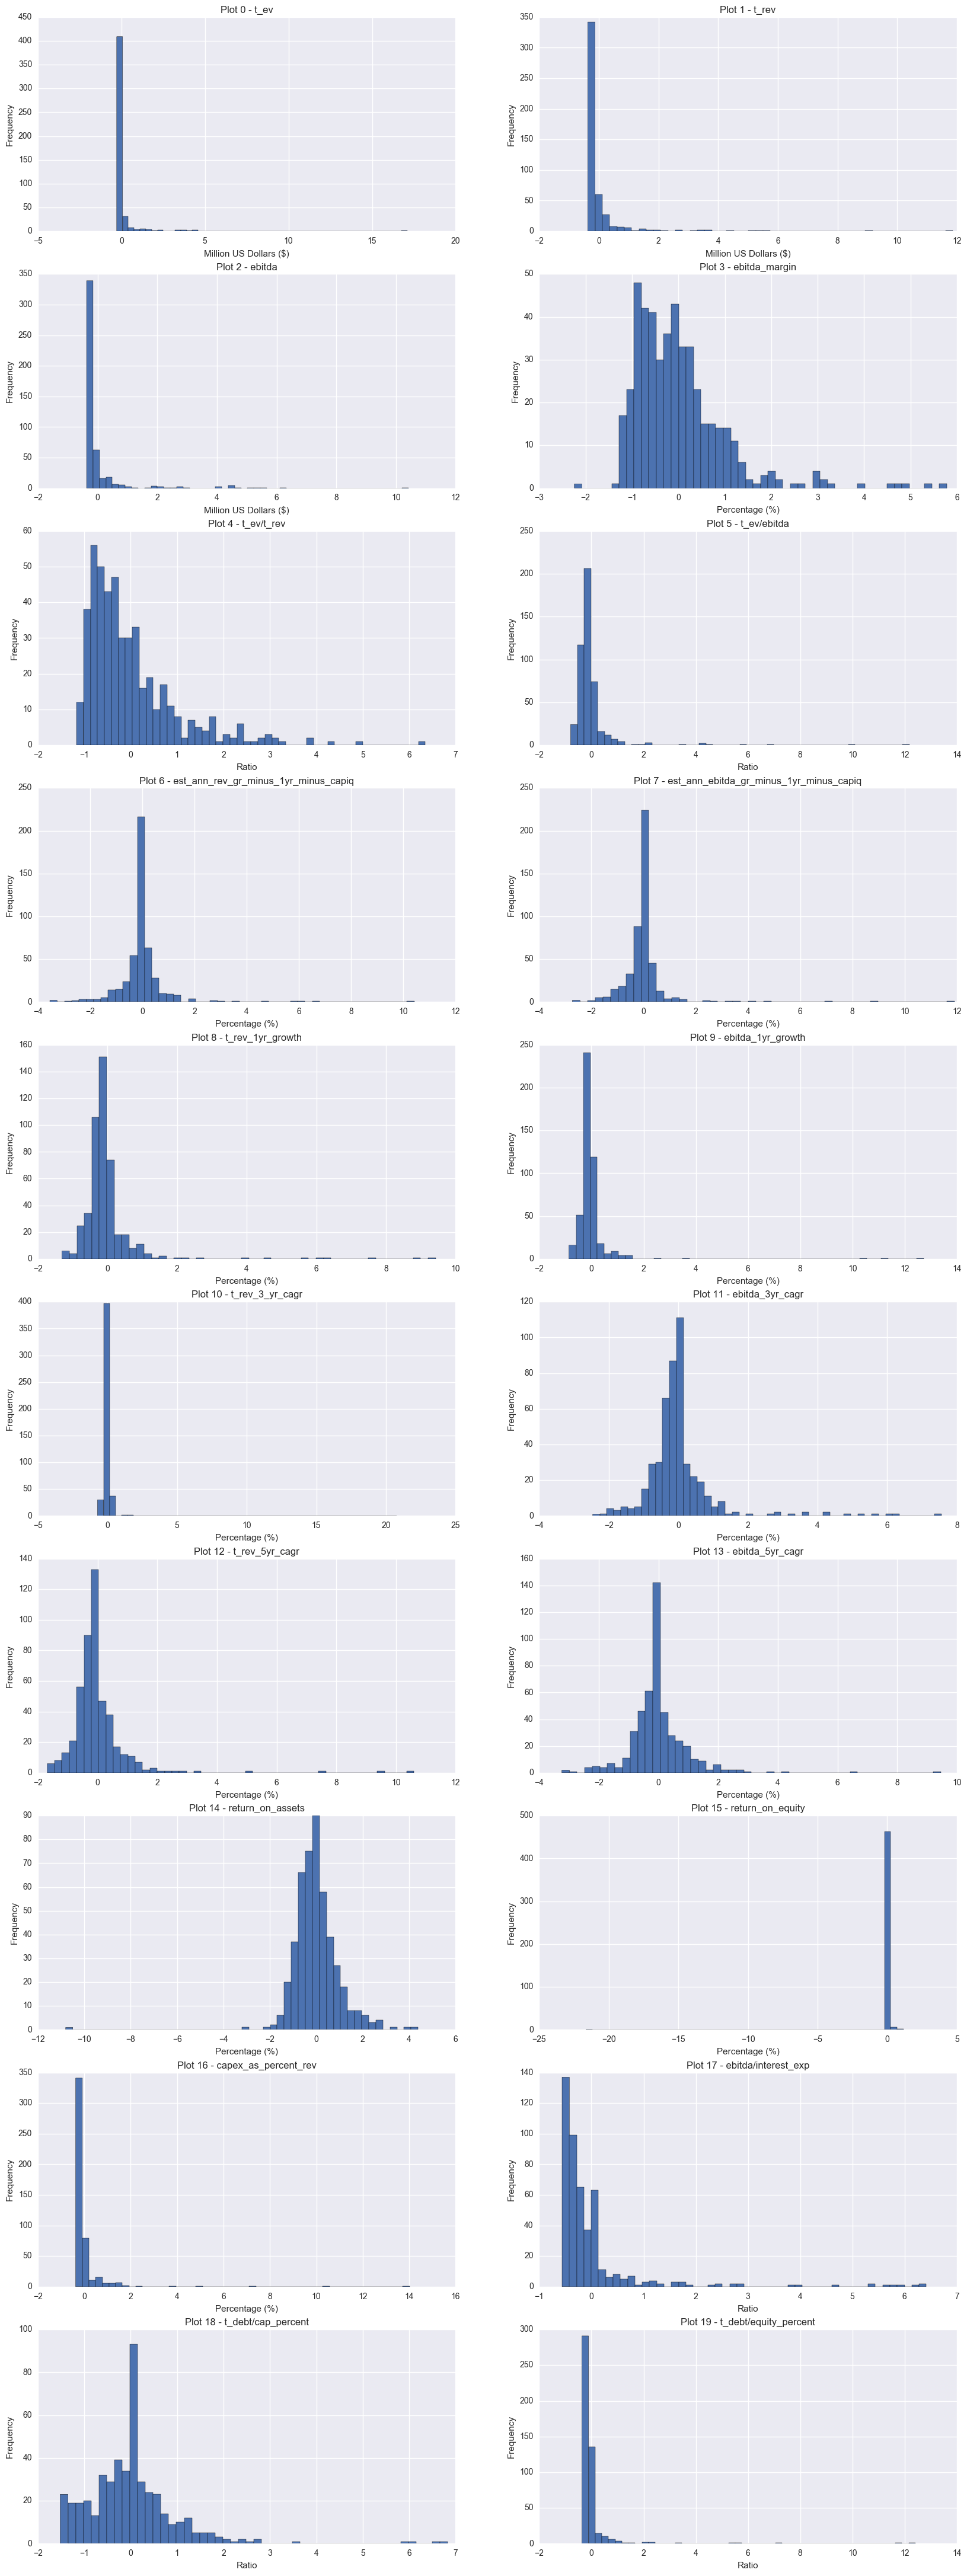

In [5]:
# Plot Standardized Feature Distributions
fig, ax = plt.subplots( 10, 2, figsize=(20, 55) )
a = ax.flatten()
for i, col in enumerate( std_industrials_df.columns ):
    std_industrials_df[col].plot( 'hist', bins=50, ax=a[i] )
    a[i].set_title( 'Plot ' + str(i) + ' - ' + col )
    a[i].set_xlabel( feature_units[i] )

It seems some features follow a normal distribution while others follow a lognormal distribution. Lets try taking the log of the features in <b>Plots 0, 1, 2, 16, 17, 18, and 19</b>, and replotting the distributions.

# Plot Standardized Log Feature Distributions

In [4]:
# Functions to Perform Log10 Operation on Specific Feature Vectors 
features_to_transform = [0, 1, 2, 16, 17, 18, 19]

def log_basis( feature_vector ):
    return np.log10( feature_vector )

def log_transform_features(feature_matrix, features_to_transform):
    transformed_features  = []
    split_features = np.split( feature_matrix, feature_matrix.shape[1], axis=1 )
    for feature_num in list(range(len( split_features ))):
        feature = split_features[ feature_num ]
        if feature_num in features_to_transform:
            feature = log_basis( feature )
        transformed_features.append( feature )
    concat_features_array = np.concatenate( transformed_features, axis=1 )
    concat_features_array = scale(mean_fill_nan_entries( concat_features_array, is_df=False ))
    return concat_features_array

In [5]:
# Transform Raw Data Features
std_industrials_log_data = log_transform_features(raw_data_arrays[2], features_to_transform)
std_industrials_log_df   = pd.DataFrame( std_industrials_log_data, columns=industrials_df_col_names )


/Users/xinyutan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log10


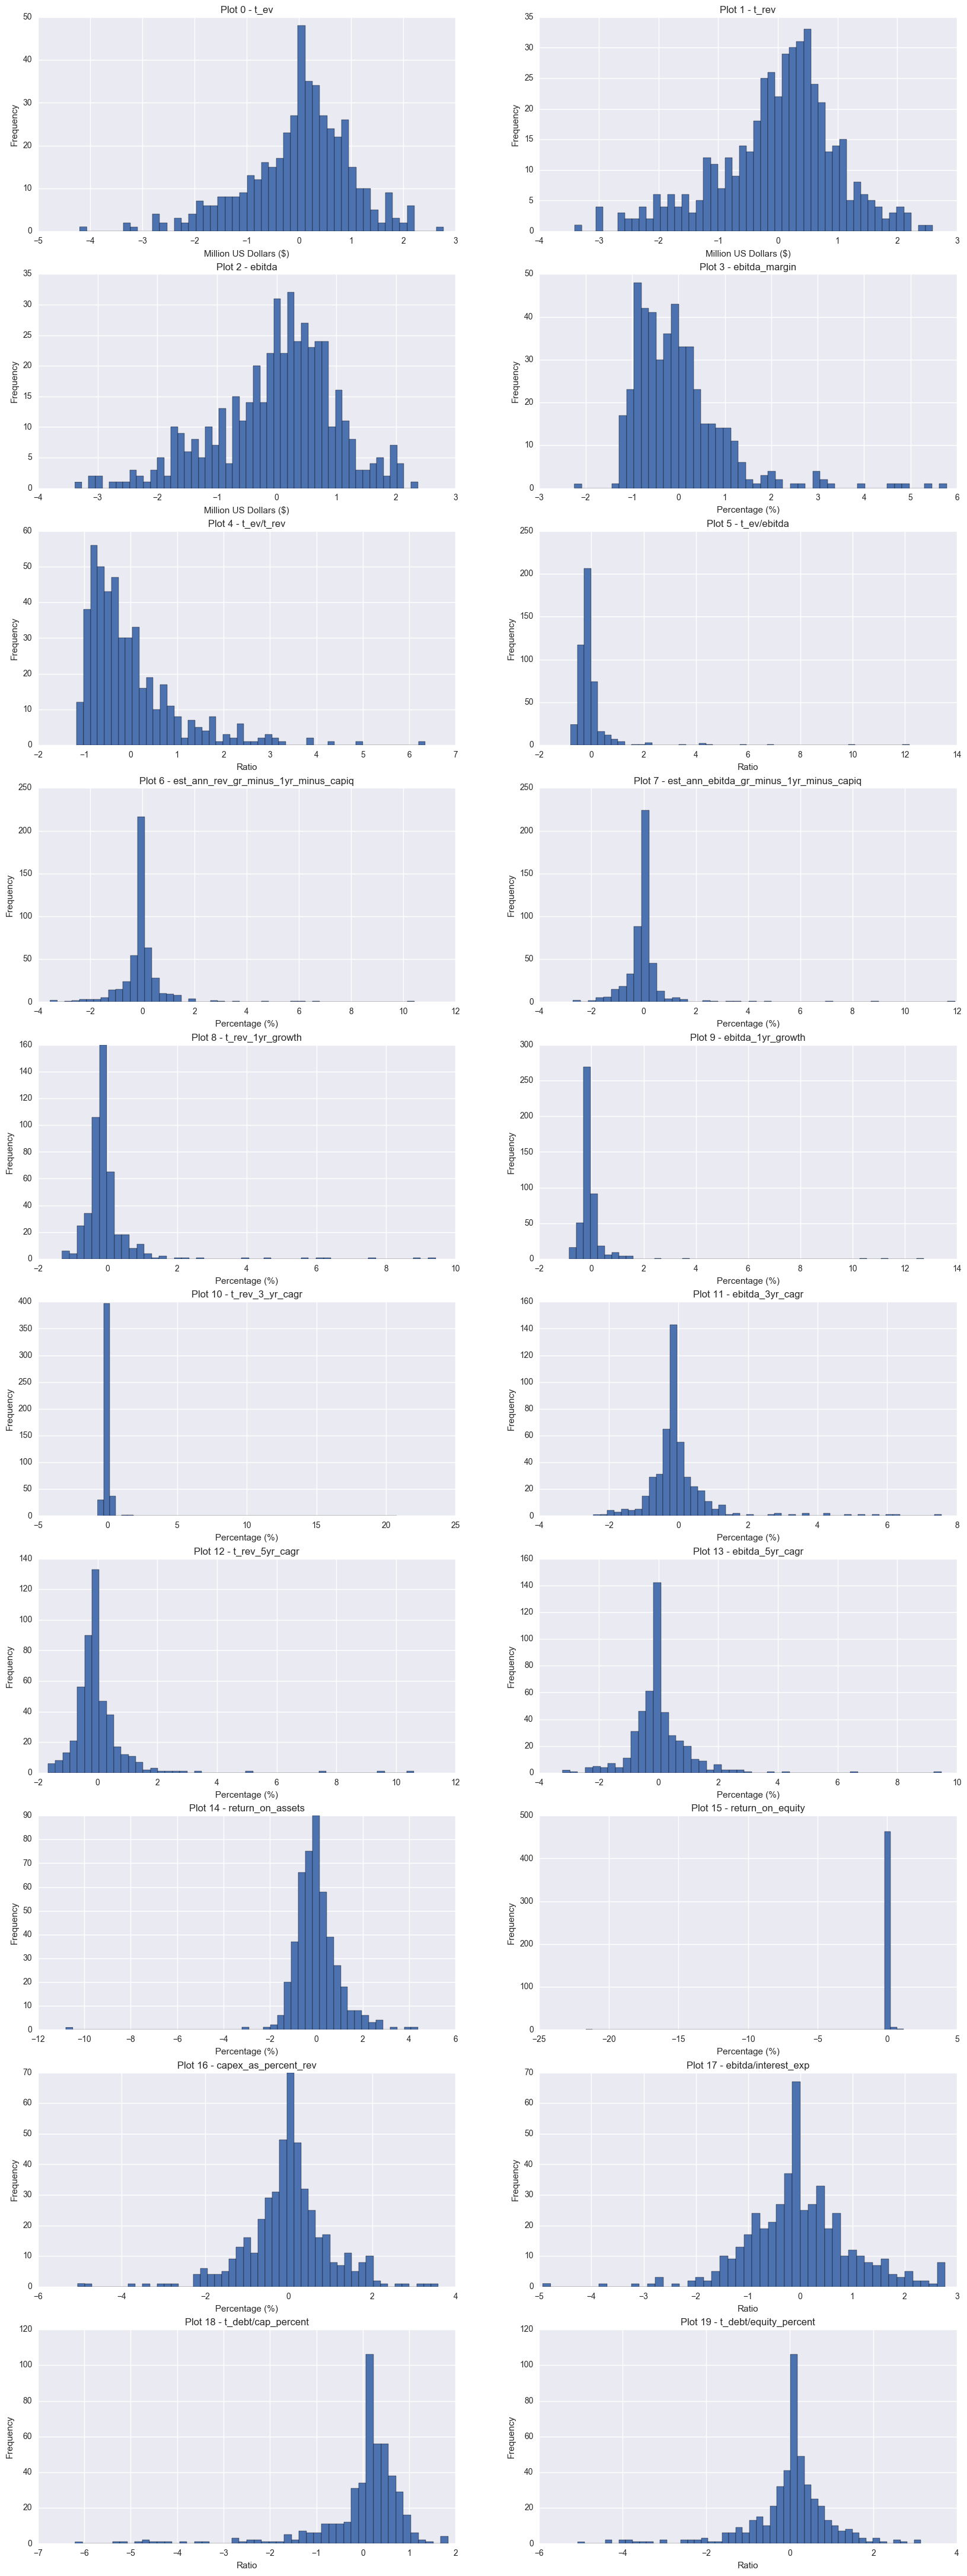

In [12]:

# Plot Raw Log Feature Distributions
fig, ax = plt.subplots( 10, 2, figsize=(20, 55) )
a = ax.flatten()
for i, col in enumerate( std_industrials_log_df.columns ):
    std_industrials_log_df[col].plot( 'hist', bins=50, ax=a[i] )
    a[i].set_title( 'Plot ' + str(i) + ' - ' + col )
    a[i].set_xlabel( feature_units[i] )

# Split Data and Drop features

In [6]:
std_industrials_log_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/t_rev,t_ev/ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,1.633461,-0.020155,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
1,0.906905,0.581865,0.775359,0.511802,0.988805,0.083611,0.255412,0.279555,-0.074525,0.030248,-0.024472,0.321060,0.292467,0.988172,0.946064,0.054256,0.109958,1.629238,-0.745165,-0.866425
2,0.190111,-0.414144,-0.001839,0.930029,1.981141,0.239261,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,-0.646015,-0.210394,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,-0.835065,0.037493,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410


In [7]:
std_industrials_log_df.drop(['t_ev/t_rev', 't_ev/ebitda'], axis=1, inplace=True)
std_industrials_log_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
1,0.906905,0.581865,0.775359,0.511802,0.255412,0.279555,-0.074525,0.030248,-0.024472,0.321060,0.292467,0.988172,0.946064,0.054256,0.109958,1.629238,-0.745165,-0.866425
2,0.190111,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410


## Hold out 20 companies

In [16]:
holdout_companies = pd.read_excel('20 Companies.xlsx', na_values=['-', 'NM'] )
holdout_companies_names = holdout_companies['Target Companies'][:18]

In [38]:
raw_data = pd.read_excel('../data/U of M Student Data - Industrials.xlsx', 'Screening', skiprows=7, na_values=['-', 'NM'])

In [44]:
hold_out_index = raw_data.loc[raw_data['Company Name'].isin(holdout_companies_names)].index

In [45]:
holdout_df = std_industrials_log_df.ix[hold_out_index]
print holdout_df.shape

(18, 18)


In [48]:
train_df = std_industrials_log_df.ix[~std_industrials_log_df.index.isin(hold_out_index)]
print train_df.shape
print raw_data.shape

(455, 18)
(473, 25)


In [49]:
train_df.head()

,t_ev,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,2.167424,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
2,0.190111,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.043199,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.366194,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410
5,-0.849986,-0.852301,-0.335211,1.199552,1.378076,-1.044443,0.953547,10.520336,-0.171992,0.565689,-0.402320,-0.141560,-0.987715,-0.042706,-4.731245,-0.034798,0.227465,0.101564


In [57]:
y_data = train_df['t_ev']
x_data = train_df.iloc[:, 1:]
x_data.head()

,t_rev,ebitda,ebitda_margin,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_growth,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex_as_percent_rev,ebitda/interest_exp,t_debt/cap_percent,t_debt/equity_percent
0,1.854476,2.063180,1.357549,-0.082415,-0.051720,-0.200552,-0.117152,-0.146568,-0.200189,-0.409785,-0.255314,1.626267,0.088648,0.500293,1.206452,0.418197,0.410737
2,-0.414144,-0.001839,0.930029,0.498185,0.315414,0.154147,0.005105,-0.043540,0.067022,0.105498,0.614568,2.846633,0.061770,0.668693,-0.034798,0.227465,0.101564
3,0.346379,0.113064,-0.644362,0.155220,0.489188,-0.086488,1.158535,-0.210868,-0.657457,-0.617963,-0.966276,-0.532379,0.030109,0.594181,0.662340,-0.751357,-0.874354
4,0.932537,0.249616,-1.023554,0.058239,0.240939,-0.048694,-0.049895,-0.058469,-0.287471,-0.160306,-0.510145,-0.532379,0.031555,-0.840162,0.366363,-0.396054,-0.550410
5,-0.852301,-0.335211,1.199552,1.378076,-1.044443,0.953547,10.520336,-0.171992,0.565689,-0.402320,-0.141560,-0.987715,-0.042706,-4.731245,-0.034798,0.227465,0.101564


# OLS Regression

In [58]:
ols_model = LinearRegression()
scores = cross_val_score(ols_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
# print('MSEs:', scores*-1)
print("Average MSE: %0.4f (+/- %0.4f)" % (-scores.mean(), scores.std()))

Average MSE: 0.2153 (+/- 0.0994)


# Lasso Regression 

Average MSE (alpha = 1e-2): 0.2083 (+/- 0.1012)


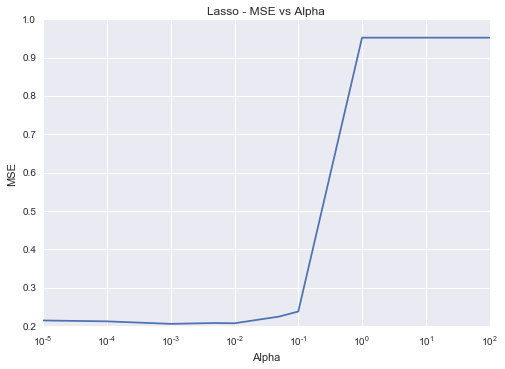

In [60]:
lasso_model = Lasso()
alphas         = [ 1e-5, 1e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 1, 10, 100 ]
lasso_mses     = []
lasso_avg_mses = []
lasso_std_mses = []

for alpha in alphas:
    lasso_model.alpha = alpha
    scores = cross_val_score(lasso_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
    lasso_mses.append( scores*-1 )
    lasso_avg_mses.append( -scores.mean() )
    lasso_std_mses.append( scores.std() )

# Plot Hyperparameter Selection
plt.semilogx( alphas, lasso_avg_mses )
plt.title('Lasso - MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')

# print('MSEs (alpha = 1e-2):', lasso_mses[3]*-1)
print("Average MSE (alpha = 1e-2): %0.4f (+/- %0.4f)" % (lasso_avg_mses[3], lasso_std_mses[3]))

# Ridge Regression

Average MSE (alpha = 1e-2): 0.2039 (+/- 0.0929)


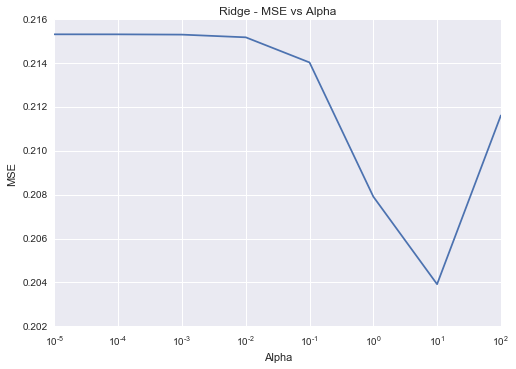

In [61]:
ridge_model = Ridge()
alphas         = [ 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100 ]
ridge_mses     = []
ridge_avg_mses = []
ridge_std_mses = []

for alpha in alphas:
    ridge_model.alpha = alpha
    scores = cross_val_score(ridge_model, x_data, y_data, scoring='neg_mean_squared_error', cv=5)
    ridge_mses.append( scores*-1 )
    ridge_avg_mses.append( -scores.mean() )
    ridge_std_mses.append( scores.std() )

# Plot Hyperparameter Selection
plt.semilogx( alphas, ridge_avg_mses )
plt.title('Ridge - MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')

# print('MSEs (alpha = 1e-2):', lasso_mses[3]*-1)
print("Average MSE (alpha = 1e-2): %0.4f (+/- %0.4f)" % (ridge_avg_mses[6], ridge_std_mses[6]))